
# **Desafio Cientista de dados**

#### Tales Rocha Ciotta 

# 1. Introdução

O objetivo deste notebook é prever o salário anual *(yearly_wage)* em duas categorias (maior que 50 mil e menor ou igual a 50 mil) de uma amostra de pessoas a partir de dados sociodemográficos anonimizados. Antes de iniciar, é necessário ter uma noção de qual problema de machine learning será resolvido.

Os problemas de Machine learning podem ser divididos em 3 áreas:
- **Classificação:** busca-se encontrar encontrar uma classe dentro de possibilidades limitadas, ou sea, gera-se como saída uma classificação qualitativa de um dado
- **Regressão:** utiliza dos dados de entrada para estimar um valor numérico
- **Agrupamento:** busca agrupar dados de atributos comuns em clusters

Considerando que o problema exige uma saída de qual categoria o salário anual se encaixa a partir de dados rotulados, estamos diante de um problema de **Classificação**, neste notebook serão empregadas técnicas de *Data Cleaning*, *EDA*, *Feature Engineering* e comparação de modelos para, não só prever a categoria de salário anual, como também demonstrar qual modelo de classificação melhor se encaixa nos dados.

# 2. Data Preprocessing & EDA

Começamos importando algumas bibliotecas necessárias para a manipulação dos dados e carregando nosso dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./wage_train.csv')
df.shape #Verificar a forma do nosso dataset

(32560, 16)

- Temos 32560 linhas no nosso dataset e 16 colunas, uma a mais do que o esperado. 

Utilizaremos uma amostra de 20 linhas aleatórias do dataset para observarmos com quais *features* estamos lidando.

In [3]:
df.sample(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
9490,9490,46,Private,128796,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,44,United-States,>50K
27060,27060,45,Private,221780,Some-college,10,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
15346,15346,32,Private,348152,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
12172,12172,55,Local-gov,99131,HS-grad,9,Married-civ-spouse,Prof-specialty,Other-relative,White,Female,0,2246,40,United-States,>50K
1170,1170,50,Private,157043,11th,7,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
26915,26915,22,Private,190916,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
25883,25883,52,Federal-gov,192065,Some-college,10,Separated,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
15725,15725,37,Private,125933,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
24409,24409,38,Private,146398,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,24,United-States,<=50K
27689,27689,36,Private,205359,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,25,United-States,<=50K


### Insights
- Com a nossa amostra, observa-se que a coluna 'Unnamed: 0' é uma coluna duplicada de índices e precisaremos eliminá-la do nosso dataset. 
- Também, nota-se a presença do caractere '?' indicando os dados que estão faltando. 
- Por fim, há redundância em alguns dados, as *features* 'education' e 'education_num', que se refere à quantidade de anos de estudo, são semelhantes. Para gerar melhores visualizações e evitar a redundância, será mantida a coluna 'education' e a 'education_num' será removida

Iniciaremos a limpeza dos dados removendo a coluna *'Unnamed:0'* e *'education_num'*

In [4]:
df.drop(['Unnamed: 0', 'education_num'], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


###### 
Faremos, então, uma contagem de linhas que tenham ' ?' presente. É importante notar que o caractere '?' vem acompanhado de um espaço.

In [5]:
df.isin([' ?']).sum() #realiza a contagem de quantas linhas tem ' ?' por coluna

age                  0
workclass         1836
fnlwgt               0
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
yearly_wage          0
dtype: int64

Observa-se que a presença se restringe a três *features*. Comparado a quantidade de dados disponibilizados, considera-se que as linhas que faltam dados não são muitas e podem ser removidas.

Remove-se essas linhas e imprime-se o número de linhas atualizada.

In [6]:
df = df[(df.astype(str) != ' ?').all(axis=1)] # Remoção das linhas com ' ?'
len(df) #imprime o número de rows do nosso dataset 

30161

###### 
Agora vamos utilizar o comando *info*, para verificar se temos dados nulos e também o *data type* das features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30161 non-null  int64 
 1   workclass       30161 non-null  object
 2   fnlwgt          30161 non-null  int64 
 3   education       30161 non-null  object
 4   marital_status  30161 non-null  object
 5   occupation      30161 non-null  object
 6   relationship    30161 non-null  object
 7   race            30161 non-null  object
 8   sex             30161 non-null  object
 9   capital_gain    30161 non-null  int64 
 10  capital_loss    30161 non-null  int64 
 11  hours_per_week  30161 non-null  int64 
 12  native_country  30161 non-null  object
 13  yearly_wage     30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


O número de dados não nulos é de 30161 para todas colunas, como sabemos que o nosso dataset tem 30161 linhas, conclui-se que está tudo certo.

######   
Investiga-se a presença de dados duplicados no nosso dataset, para isso, faremos uma contagem

In [8]:
df.duplicated().sum()#contagem de duplicatas

23

Temos 23 linhas duplicadas, iremos removê-la e atualizar a nossa contagem de linhas.

In [9]:
df.drop_duplicates(inplace=True)#elimna as duplicatas
len(df)#imprime a quantidade de linhas do dataset

30138

#### Até aqui já foi feito:
- Remoção de colunas com dados não significativos e redundantes
- Remoção de linhas que tinham dados faltando
- Eliminação de duplicatas

Começa-se a investigar a possibilidade de agrupar os dados das *features* de tipo de dado *object*. Iniciamos com uma contagem de valores únicos por coluna do dataset

In [10]:
df.nunique()

age                  72
workclass             7
fnlwgt            20262
education            16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
yearly_wage           2
dtype: int64

### Insights 
- Considerando que a coluna 'education' se refere ao nível de educação e a coluna 'marital_status' o estado civil , o número de valores únicos para essas categorias parecem um pouco altos, é necessário investigar melhor 
- Outras colunas tem valores razoáveis quando considerado o significado dos dados que armazenam 
- Para as colunas que armazenam dados do tipo contínuo já era esperado que apresentassem maiores quantidades de valores únicos

Inicia-se fazendo a contagem dos valores da coluna de 'education'.

In [11]:
df['education'].value_counts()

 HS-grad         9834
 Some-college    6669
 Bachelors       5041
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

Observa-se que realmente existem muitas subdivisões do nível de educação. Elenca-se agrupar os dados das pessoas que não concluíram o *High School* em um grupo chamado de *HS-Dropout* e também agrupar os graus de 'Assoc-voc' e 'Assoc-acdm' em um grupo geral chamado *Associate* 

Para isso, substituí-se as subdivisões:

In [12]:
df['education'].replace(['11th','10th','7th-8th','9th','12th','8th-6th','1st-4th','5th-6th','Preschool'], 'HS-Dropout',inplace=True,regex=True) #Agrupar em Hs-Droput
df['education'].replace(['Assoc-voc','Assoc-acdm'], 'Associate',inplace=True,regex=True) #Agrupar graus de Associate

Repete-se o procedimento de contagem para a coluna 'marital_status'.

In [13]:
df['marital_status'].value_counts()

 Married-civ-spouse       14059
 Never-married             9710
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

Observa-se que o grupo de casados se subdivide, podemos agrupá-los criando apenas uma categoria denominada *Married*

Substuí-se as subdivisões

In [14]:
df['marital_status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married', inplace= True, regex=True) #Agrupa o grupo de casados

##### 
Reduziu-se a quantidade de valores únicos presentes nas categorias que armazenam váriaveis do tipo *object*. Agora, investiga-se os dados numéricos.

Para isso, utilizaremos o comando *describe* para obtermos algumas estatísticas e analisá-las

In [15]:
df.describe()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,1092.805329,88.442863,40.934734
std,13.131643,1.056584e+05,7409.230902,404.451628,11.978951
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


### Insights
- O range das idades é aceitável. A idade média dos trabalhadores é de cerca de 38 anos o que é razoável. Em um cenário que apresentasse um alto valor da idade média dos trabalhadores seria um alerta, já que sem a reposição de trabalhadores no mercado de trabalho seriam necessária mudanças estruturais na forma de trabalho para evitar um colapso.
- fnlwgt significa final weight se refere ao número de pessoas que o Censo acredita que aqueles dados representam
- Observa-se nas colunas de capital_gain e capital_loss, que representam o ganho e perda de capita com a venda de ativos, os valores dos quartis que são 0. Isso indica que temos uma grande quantidade de valores zerados nessas duas colunas. Também o valor máximo de capital_gain chama atenção por ser o número 99999
- O range de hours_per_weeks também está aceitável, com o máximo de 99 horas de trabalho por semana e uma média de aproximadamente 41 h por semana

Para melhor visualização dos dados de 'capital_gain' e 'capital_loss' utilizaremos um Gráfico de Violino

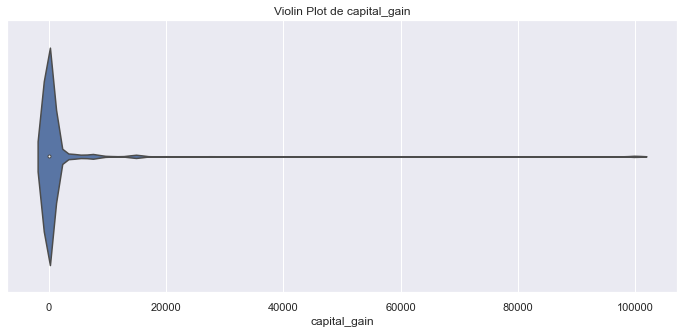

In [16]:
sns.set_style("darkgrid") #Define o estilo do fundo do gráfico
sns.set(rc={'figure.figsize':(12,5)}) #Define o tamanho dos gráficos
sns.violinplot(x=df['capital_gain']).set(title='Violin Plot de capital_gain'); #Plota o gráfico para capital_gain // Deve ser adicionado ';' ao final para esconder a descrição do seaborn

### Insights 

- Observa-se que há uma grande densidade de zeros, como esperado. Nota-se também que a densidade de dados em uma grande faixa de capital_gain é nula até aumentar no valor máximo.

Seguimos com a visualização dos dados de *capital_loss* em um gráfico de Violino

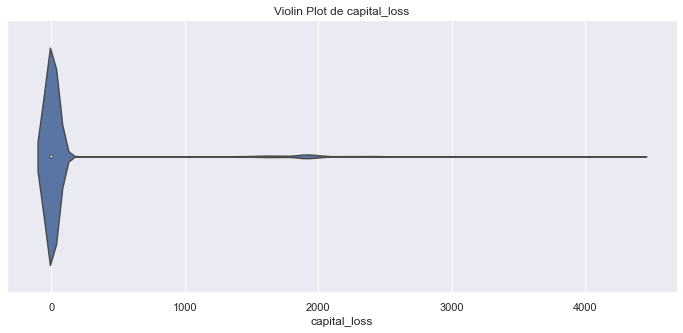

In [17]:
sns.set(rc={'figure.figsize':(12,5)}) 
sns.violinplot(x=df['capital_loss']).set(title='Violin Plot de capital_loss');

### Insights 

- Novamente pode ser observada a grande densidade de zeros
- O valor máximo de capital_loss é coerente

A fim de gerar mais insights sobre os dados, segue-se com a análise exploratória, buscando relações entre as diferentes features com a feature de salário anual *'yearly_wage'*

Primeiro, plota-se um histograma para observar a contagem de indivíduos que ganham mais que 50 mil e que ganham menos ou igual.

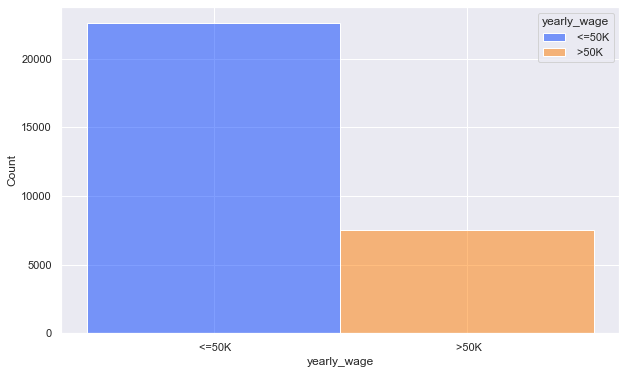

In [18]:
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(x="yearly_wage", hue = 'yearly_wage', palette = 'bright', data=df, stat="count");

### Insights 
- Temos uma quantidade considerável a mais de pessoas que gnaham menos ou igual a 50 mil

Segue-se plotando o gráfico de estimativa de densidade de horas trabalhadas cruzando com os dados de salário anual

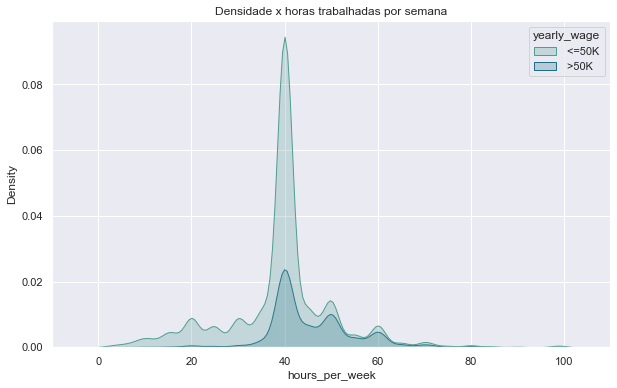

In [19]:
sns.set(rc={'figure.figsize':(10,6)})
sns.kdeplot(data=df, x='hours_per_week', hue='yearly_wage', palette='crest', fill=all).set(title = 'Densidade x horas trabalhadas por semana');#Gráfico Densidade x hours_per_week

### Insights 
- A grande maioria dos trabahadores que recebem salários maiores de 50 mil trabalham pelo menos 40 horas semanais, é esperado que com a dimunição das horas trabalhadas que as chances de ganhar salários maiores diminuam.
- Poucas pessoas trabalham mais que 60 horas por semana
- A maioria dos trabalhadores que ganham menos que 50 mil trabalham 40 horas semanais. A jornada de trabalho do setor privado normalmente dura 8 horas por dia, a grande densidade pode ser um indicativo que a maioria dos trabalhadores do dataset são empregados no setor privado

Investiga-se a distribuição das diferentes classes de trabalho presentes no dataset e ao mesmo tempo cruza-se os dados com o de salário anual através de um histograma

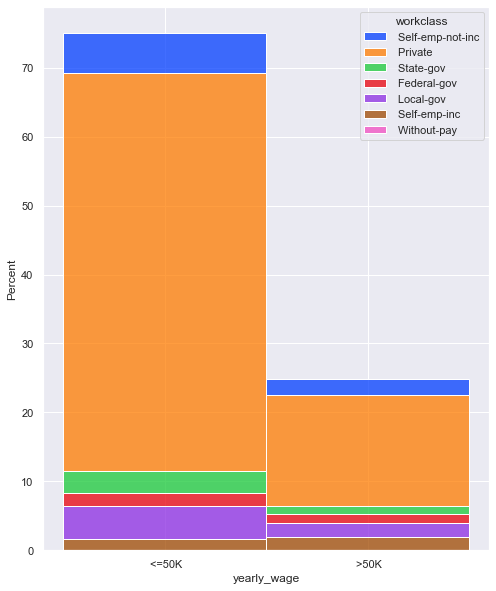

In [20]:
sns.set(rc={'figure.figsize':(8,10)})
sns.histplot(x="yearly_wage", hue="workclass", palette='bright', data=df, stat="percent", multiple="stack",);

### Insights 
- A maioria dos trabalhadores são do setor privado, o que justifica a densidade de dados de 40 horas trabalhadas por semana
- O setor que domina a quantidade de salários maiores que 50 mil do dataset também é o privado
- A maioria das pessoas que são autônomas **e** que trabalham através de entidades corporativas, conhecidos como *Incorporated Self Employed* (Self-emp-inc) ganham mais que 50 mil, já os autônomos que não trabalham através de entidades corporativas (Self-emp-not-inc)

Segue-se com a análise de dados com um gráfico de estima de densidade de kernel para os dados de idade, cruzando com os salários anuais.

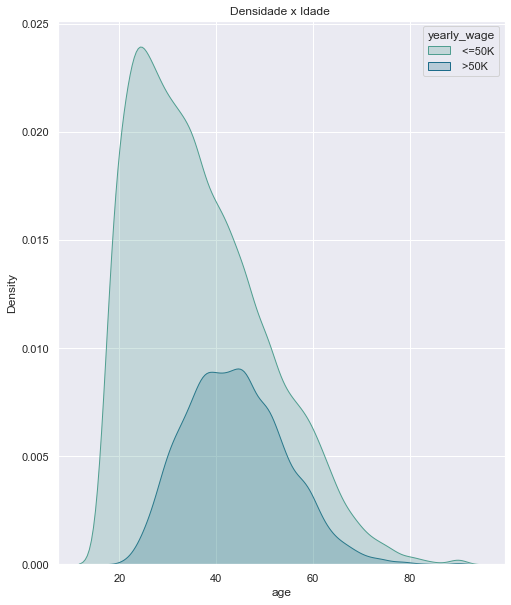

In [21]:
sns.kdeplot(data=df, x='age', hue='yearly_wage', palette='crest', fill=all).set(title = 'Densidade x Idade ');

### Insights
- A idade mínima de quem ganha mais que 50 mil é maior do que quem ganha menos, o que é esperado
- A maior densidade de pessoas que ganham **mais** que 50 mil está na faixa etária da meia idade
- A maior densidade de pessias que ganham **menos** que 50 mil são mais jovens

Seguimos a análise explorando as ocupações e as relações com o salário anual através de um *countplot*



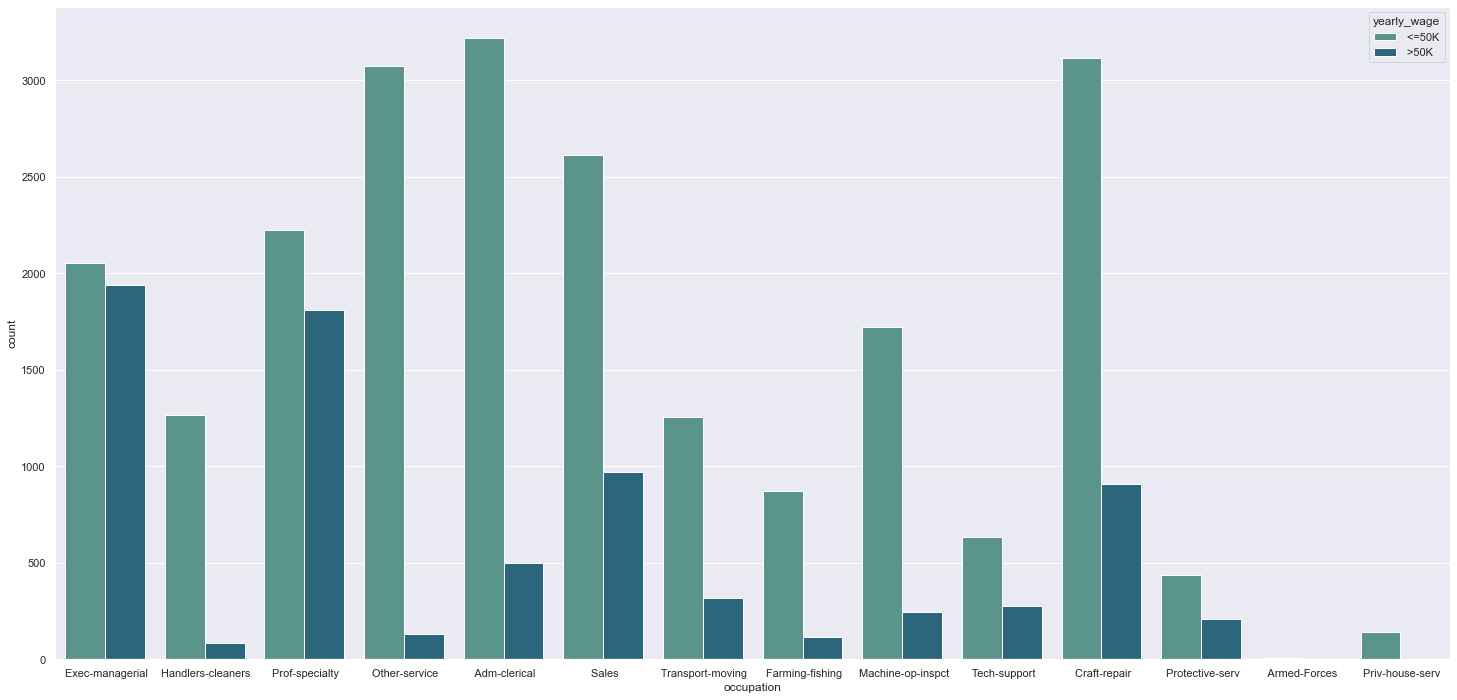

In [22]:
sns.set(rc={'figure.figsize':(25,12)})
sns.countplot(data=df, x = 'occupation', hue = 'yearly_wage', palette='crest');

### Insights

- As ocupações de *Executive Manager* e *Professional Specialty* são as que apresentam não só a maior quantidade de pessoas que ganham mais que 50 mil como apresentam uma boa razão em relação ao total dos trabalhadores nessa área
- No histograma não é possível visualizar os dados para a ocupação *Armed-forces* pois a sua ocorrência é pequena. Julga-se não necessário a visualização desse dado individualmente pois a contagem de 9 indivíduos não será suficiente para gerar inferências coerentes

Analisa-se, agora, a relação do sexo com o salário anual através de um histograma

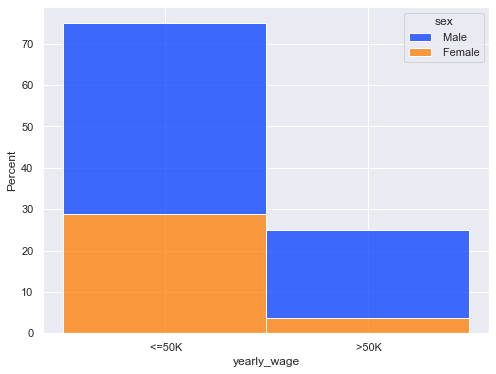

In [23]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(binwidth=0.5, x="yearly_wage", hue="sex", data=df, stat="percent", multiple="stack", palette='bright');

### Insights

- Observa-se que no nosso dataset homens são maioria
- A porcentagem de homens que ganham **mais** de 50 mil, quando comparado ao **percentual total de homens**, é muito maior do que o percentual de mulheres que ganham **mais** que 50 mil comparado com o **percentual total de mulheres.**

Segue-se a análise com um histograma que relaciona a raça e o salário anual

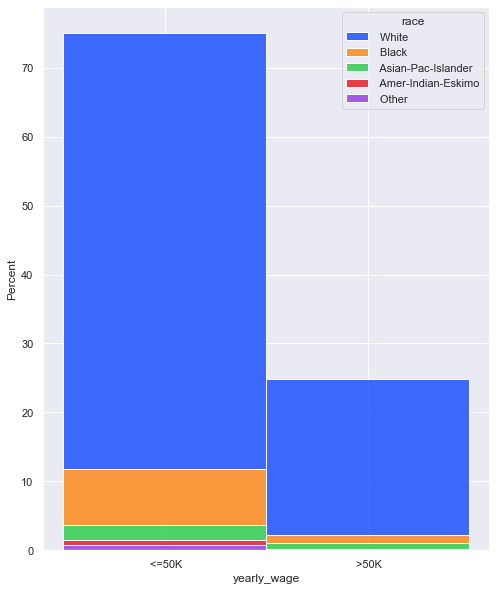

In [24]:
sns.set(rc={'figure.figsize':(8,10)})
sns.histplot(x="yearly_wage", hue="race", palette='bright', data=df, stat="percent", multiple="stack",);

### Insights

- Os dados do dataset são de população predominantemente branca
- Dentre as minorias o grupo *'Asian-Pac-Islander'* possui a maior porcentagem de pessoas que ganham mais que 50 mil quando comparados ao percentual total de indivíduos do grupo presentes no dataset

Investiga-se a relação do estado civil com o salário anual

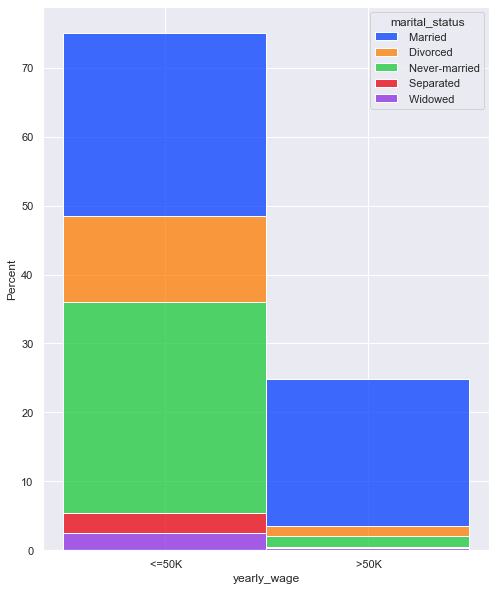

In [25]:
sns.set(rc={'figure.figsize':(8,10)})
sns.histplot(x="yearly_wage", hue="marital_status", palette='bright', data=df, stat="percent", multiple="stack",);

### Insights

- A maioria das pessoas que ganham *mais* que 50 mil por ano são casadas
- Pouquíssimas pessoas separadas sem dissolução de casamento ou viúvas ganham mais que 50 mil
- A grande maioria das pessoas que ganham **menos** que 50 mil nunca se casaram, considerando que é mais provável que um jovem ainda não tenha se casado e que a maior parte dos jovens não ganham mais que 50 mil o resultado era esperado

# 3. Modelo preditivo

Os tipos de Machine Learning podem ser dividos em quatro grupos, o de aprendizado supervisionado, semi-supervisionado, não supervisionado e o de aprendizado por reforço. 
- **Machine learning supervisionado:** utiliza um conjunto de dados rotulados para treinar os algoritmos que estabelecem relações entre os dados de entrada e saída a fim de inferir uma função capaz prever os valores de saídas de novos dados.

- **Machine learning não supervisionado:** os algoritmos de machine learning analisam e agrupam dados nao rotulados a fim de descobir padrões sem ser necessária a intervenção humana.

- **Machine learning semi-supervisionado:** uma pequena parcela de dados é rotulada e utilizada para orientar a classificação e extração de recursos de um conjunto de dados não rotulado

- **Machine learning de reforço:** o modelo não é treinado utilizando amostras, ele aprende com a tentativa e erro.

Agora que os dados estão mais limpos e insights foram gerados através das visualizações na análise exploratória, começa-se a seção em que vamos preparar as nossas features para aplicar o modelo, comparar os modelos e por fim prever as categorias de salário

Inicia-se recapitulando os tipos de dados:

In [26]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
yearly_wage       object
dtype: object

Cria-se uma variável chamada target que receberá a coluna de *'yearly_wage'*

In [27]:
target = df['yearly_wage']
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: yearly_wage, Length: 30138, dtype: object

Como alguns modelos de machine learning necessitam de variáveis numéricas, substituí-se as categorias pelos seguintes valores:
- **Menor ou igual a 50k:** 0
- **Maior que 50k:** 1

In [28]:
target.replace([' <=50K'], 0, inplace = True)
target.replace([' >50K'], 1, inplace = True)
df.head() #Printa as primeiras linhas para verificar a mudança

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,HS-Dropout,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


###### 
Precisamos realizar o encoding (processo de conversão de colunas categóricas em colunas numéricas) do resto dos dados:

In [29]:
df = df.drop('yearly_wage', axis=1)

In [30]:
type_groups = df.columns.to_series().groupby(df.dtypes).groups
type_groups_dict = {k.name: v for k, v in type_groups.items()}
object_columns = type_groups_dict["object"].to_list()

Realiza-se o one-hot encoding dos dados categóricos. O one hot encoding é útil pois alguns modelos de machine learning tratam a ordem de números como um atributo que tem significância.

In [31]:
train = pd.get_dummies(data = df, columns=object_columns)

In [32]:
train #imprime os dados de treino após o enconding

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


###### 
Importa-se, então as bibliotecas necessárias para a aplicação e comparação de modelos

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing

### 3.1 Comparação de modelos 

Para comparar diferentes modelos de machine learning e realizar uma escolha informada sobre qual usar para o problema enfrentado, irá-se usar a técnica de Validação Cruzada utilizando o *Stratified K Fold*, dessa forma garante-se que os dados serão dividos de forma uniforme entre os folds. Além disso, se utilizará a acurácia como medida de performance.

Existem diversos modelos para a resolução de problema de classificação, elenca-se que a comparação entre modelos será feita com os seguintes modelos:

- **Logistic Regression:** mede a relação a variável dependente e uma ou mais variáveis independentes estimando probabilidades usand ouma função logística
- **K-Nearest Neighbors:** atribui pesos de acordo com a distância determinado ponto de dado aos pontos vizinhos.
- **Decision Trees:** separa o dataset em menores subsets e estabelece nós de decisão que se relacionam entre si por uma hierarquia 
- **Random Forrest:** esse algoritmo cria várias árvores de decisão. É um *emsemble algorithm* ou seja, é um algoritmo que utiliza a combinação de diferentes modelos para obter um único resultado. Apresenta maior demanda computacional, mas geralmente gera melhores resultados
- **Gradient Boosting Classification:** também é um *ensemble algorithm*, esse modelo tem uma abordagem sequencial e cada árvore de decisão prevê o erro da árvore de decisão anterior.


In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #importa os 2 ensemble algorithms que serão testados
from sklearn.linear_model import LogisticRegression #importa o modelo de Regressão logística
from sklearn.neighbors import KNeighborsClassifier # impota o modelo Kneighbors
from sklearn.tree import DecisionTreeClassifier #importa o modelo de árvores de devisão

Para a aplicação dos modelos será necessário a aplicação de um scaler

In [35]:
scaler = preprocessing.StandardScaler() #variável scaler recebe o standart scaler da biblioteca preprocessing
train_numpy = scaler.fit_transform(train) #aplicação do scaler

In [36]:
target_numpy = target.to_numpy()
target_numpy

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Então divide-se os dados de teste e treino

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_numpy, target_numpy, test_size= 0.30, random_state = 0)

Verifica-se a forma dos dados de teste e treino

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((21096, 93), (21096,), (9042, 93), (9042,))

Importa-se algumas bibliotecas para obter as métricas dos modelos

In [39]:
from sklearn.metrics import accuracy_score, classification_report

Executa-se a covalidação por kfold para cada modelo e ao fim será realizada a análise dos resultados obtidos

In [40]:
lr = LogisticRegression()

In [41]:
cv= StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accu_list = []  
for train_index, test_index in cv.split(train_numpy, target_numpy):
    x_train_fold, x_test_fold = train_numpy[train_index], train_numpy[test_index]
    y_train_fold, y_test_fold = target_numpy[train_index], target_numpy[test_index]
    lr.fit(x_train_fold, y_train_fold)
    accu_list.append(lr.score(x_test_fold, y_test_fold))
    
print(accu_list)
print('\nAcurácia Máxima:',
      max(accu_list)*100, '%')
print('\nAcurácia Mínima:',
      min(accu_list)*100, '%')
print('\nOverall Accuracy:',
      mean(accu_list)*100, '%')
print('\nO desvio padrão é:', stdev(accu_list))

[0.847378898473789, 0.8573324485733245, 0.8543463835434638, 0.8414067684140677, 0.8556735235567352, 0.8480424684804246, 0.8480424684804246, 0.8417385534173856, 0.8430136076999668, 0.8446730833056754]

Acurácia Máxima: 85.73324485733245 %

Acurácia Mínima: 84.14067684140677 %

Overall Accuracy: 84.81648203945257 %

O desvio padrão é: 0.005821232780555685


In [42]:
tree = DecisionTreeClassifier()

In [43]:
for train_index, test_index in cv.split(train_numpy, target_numpy):
    x_train_fold, x_test_fold = train_numpy[train_index], train_numpy[test_index]
    y_train_fold, y_test_fold = target_numpy[train_index], target_numpy[test_index]
    tree.fit(x_train_fold, y_train_fold)
    accu_list.append(tree.score(x_test_fold, y_test_fold))

print('\nAcurácia Máxima:',
      max(accu_list)*100, '%')
print('\nAcurácia Mínima:',
      min(accu_list)*100, '%')
print('\nOverall Accuracy:',
      mean(accu_list)*100, '%')
print('\nO desvio padrão é:', stdev(accu_list))


Acurácia Máxima: 85.73324485733245 %

Acurácia Mínima: 79.56204379562044 %

Overall Accuracy: 82.87872052338561 %

O desvio padrão é: 0.0214430519289722


In [44]:
RFC = RandomForestClassifier()

In [45]:
for train_index, test_index in cv.split(train_numpy, target_numpy):
    x_train_fold, x_test_fold = train_numpy[train_index], train_numpy[test_index]
    y_train_fold, y_test_fold = target_numpy[train_index], target_numpy[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    accu_list.append(RFC.score(x_test_fold, y_test_fold))

print('\nAcurácia Máxima:',
      max(accu_list)*100, '%')
print('\nAcurácia Mínima:',
      min(accu_list)*100, '%')
print('\nOverall Accuracy:',
      mean(accu_list)*100, '%')
print('\nO desvio padrão é:', stdev(accu_list))


Acurácia Máxima: 86.33045786330457 %

Acurácia Mínima: 79.56204379562044 %

Overall Accuracy: 83.65293379944005 %

O desvio padrão é: 0.020968358297054956


In [46]:
GBC = GradientBoostingClassifier()

for train_index, test_index in cv.split(train_numpy, target_numpy):
    x_train_fold, x_test_fold = train_numpy[train_index], train_numpy[test_index]
    y_train_fold, y_test_fold = target_numpy[train_index], target_numpy[test_index]
    GBC.fit(x_train_fold, y_train_fold)
    accu_list.append(GBC.score(x_test_fold, y_test_fold))
    
print('\nAcurácia Máxima:',
      max(accu_list)*100, '%')
print('\nAcurácia Mínima:',
      min(accu_list)*100, '%')
print('\nOverall Accuracy:',
      mean(accu_list)*100, '%')
print('\nO desvio padrão é:', stdev(accu_list))


Acurácia Máxima: 87.52488387524883 %

Acurácia Mínima: 79.56204379562044 %

Overall Accuracy: 84.30715131576484 %

O desvio padrão é: 0.021634794545553445


In [47]:
kn = KNeighborsClassifier()

for train_index, test_index in cv.split(train_numpy, target_numpy):
    x_train_fold, x_test_fold = train_numpy[train_index], train_numpy[test_index]
    y_train_fold, y_test_fold = target_numpy[train_index], target_numpy[test_index]
    kn.fit(x_train_fold, y_train_fold)
    accu_list.append(kn.score(x_test_fold, y_test_fold))
    
print('\nAcurácia Máxima:',
      max(accu_list)*100, '%')
print('\nAcurácia Mínima:',
      min(accu_list)*100, '%')
print('\nOverall Accuracy:',
      mean(accu_list)*100, '%')
print('\nO desvio padrão é:', stdev(accu_list))


Acurácia Máxima: 87.52488387524883 %

Acurácia Mínima: 79.56204379562044 %

Overall Accuracy: 83.89803816287352 %

O desvio padrão é: 0.021155836769081567


Utilizando como critério a maior *Overall Accuracy* temos que o modelo de regressão logística e Gradient Boosting performaram melhor. Realiza-se então a predição com ambos modelos

In [48]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.8441716434417165

In [103]:
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)
accuracy_score (y_pred, y_test)

0.8589913735899137

**O modelo de Gradient Boosting apresentou maior acurácia em sua predição, porém, por ser um algoritmo mais complexo sua maior acurácia vem acompanhada também de uma maior exigência computacional.**

In [121]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
predictions = pd.DataFrame(y_pred)

In [106]:
predictions.index.name = 'rowNumber'

In [108]:
predictions.rename( columns={0 :'predictedValues'}, inplace=True )

In [109]:
predictions

,predictedValues
rowNumber,
0,0
1,0
2,0
3,1
4,0
...,...
9037,0
9038,0
9039,0


In [116]:
predictions.to_csv("./predicted.csv",sep=";")

In [119]:
teste = pd.read_csv('./predicted.csv',sep=";")

In [120]:
teste

,rowNumber,predictedValues
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
9037,9037,0
9038,9038,0
9039,9039,0
9040,9040,0
